<a href="https://colab.research.google.com/github/GuillaumeArp/Wild_Notebooks/blob/main/Classification_challenge_weather_Guillaume_Arp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

In [ ]:
# Uncomment this command before first run, then restart the runtime comment it again before running all the cells.

#! pip install plotly --upgrade

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import plotly.express as px

link_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
print(df_main.head())
print(df_opinion.head())

         DATE  MAX_TEMPERATURE_C  ...  DEWPOINT_MAX_C  WINDTEMP_MAX_C
0  2018-01-01                 12  ...               8               7
1  2018-01-02                 13  ...              12               6
2  2018-01-03                 15  ...              13               7
3  2018-01-04                 14  ...              12              10
4  2018-01-05                 12  ...              10               7

[5 rows x 15 columns]
         date  WEATHER_CODE_EVENING  TOTAL_SNOW_MM  UV_INDEX  SUNHOUR OPINION
0  2018-01-01                   113              0         3      5.1     bad
1  2018-03-12                   119              0         2      8.8     bad
2  2018-03-09                   116              0         3     10.2     bad
3  2018-10-07                   122              0         1      5.6     bad
4  2018-06-18                   119              0         1     12.9     bad


# Classification challenge

Your goal are :
- to merge both 2018 DataFrames
- to train-test split the new 2018 DataFrame
- to train 3 differents Machine Learning algorithms (KNN, logistic regression and decision tree) with "opinion" as target
- to try different parameters
- to find the best accuracy score (on the test set of course)
- to fill the missing values in the "opinion" columns whith your best model
- to explain what is the "rules" used by your model to predict the opinion.

You can help yourself with charts if you want.

## Load and transform the datasets

In [ ]:
# Your code here :
def merge_and_fill(DataFrameMain, DataFrameOpinion):

  df = pd.merge(DataFrameMain, DataFrameOpinion, how="left", left_on='DATE', right_on='date')
  df.drop('date', axis=1, inplace=True)
  df['flag'] = df['OPINION'].isna()
  df['DATE'] = pd.to_datetime(df['DATE'])
  df['MONTH'] = df['DATE'].apply(lambda x: x.month)
  df['DAY'] = df['DATE'].apply(lambda x: x.day)
  df['WEATHER_CODE_EVENING'].fillna(round(np.mean(df['WEATHER_CODE_EVENING'])), inplace=True)
  df['TOTAL_SNOW_MM'].fillna(round(np.mean(df['TOTAL_SNOW_MM'])), inplace = True)
  df['UV_INDEX'].fillna(round(np.mean(df['UV_INDEX'])), inplace = True)
  df['SUNHOUR'].fillna(method = 'bfill', inplace = True)

  return df

In [ ]:
df = merge_and_fill(df_main, df_opinion)
df

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag,MONTH,DAY
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,113.0,0.0,3.0,5.1,bad,False,1,1
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,122.0,0.0,3.0,3.3,bad,False,1,2
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,122.0,0.0,3.0,3.3,bad,False,1,3
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,116.0,0.0,3.0,3.3,bad,False,1,4
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,116.0,0.0,3.0,6.9,bad,False,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,7,2,6,2,6,5,0.0,85,10.000,1027,30.750,8,6,3,119.0,0.0,1.0,8.7,very bad,False,12,27
361,2018-12-28,7,2,8,2,7,3,0.0,89,8.000,1035,18.750,8,4,4,113.0,0.0,1.0,8.7,very bad,False,12,28
362,2018-12-29,7,1,6,1,6,4,0.0,94,7.000,1038,33.000,8,5,1,116.0,0.0,1.0,8.7,very bad,False,12,29
363,2018-12-30,9,4,6,5,9,8,0.1,95,6.000,1038,70.375,10,9,7,143.0,0.0,1.0,3.3,very bad,False,12,30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DATE                    365 non-null    datetime64[ns]
 1   MAX_TEMPERATURE_C       365 non-null    int64         
 2   MIN_TEMPERATURE_C       365 non-null    int64         
 3   WINDSPEED_MAX_KMH       365 non-null    int64         
 4   TEMPERATURE_MORNING_C   365 non-null    int64         
 5   TEMPERATURE_NOON_C      365 non-null    int64         
 6   TEMPERATURE_EVENING_C   365 non-null    int64         
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64       
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64         
 9   VISIBILITY_AVG_KM       365 non-null    float64       
 10  PRESSURE_MAX_MB         365 non-null    int64         
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64       
 12  HEATINDEX_MAX_C         365 non-null    int64     

In [ ]:
df_nan = df[df['OPINION'].isna()].copy()
df_nan.shape

(24, 23)

In [ ]:
df_clean = df.dropna().copy()
df_clean.shape

(341, 23)

## Train, Test, Split the clean dataset

In [ ]:
cols = df_clean.columns[1:19]
X = df_clean[cols]
y = df_clean['OPINION']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.75)

## Fit 3 classification models (KNN, Decision Tree, Logistic Regression)

### KNN

In [ ]:
modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train, y_train)

print(f"Accuracy score on the train dataset: {modelKNN.score(X_train, y_train)}")
print(f"Accuracy score on the test dataset: {modelKNN.score(X_test, y_test)}")

Accuracy score on the train dataset: 0.8235294117647058
Accuracy score on the test dataset: 0.7325581395348837


In [ ]:
pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = modelKNN.predict(X_test)),
             index = modelKNN.classes_ + " ACTUAL",
             columns = modelKNN.classes_ + " PREDICTED")

,bad PREDICTED,good PREDICTED,not good not bad PREDICTED,very bad PREDICTED,very good PREDICTED
bad ACTUAL,16,0,1,0,0
good ACTUAL,1,14,3,0,3
not good not bad ACTUAL,5,4,10,0,0
very bad ACTUAL,3,1,0,20,0
very good ACTUAL,0,2,0,0,3


In [ ]:
print(classification_report(y_test, modelKNN.predict(X_test)))

                  precision    recall  f1-score   support

             bad       0.64      0.94      0.76        17
            good       0.67      0.67      0.67        21
not good not bad       0.71      0.53      0.61        19
        very bad       1.00      0.83      0.91        24
       very good       0.50      0.60      0.55         5

        accuracy                           0.73        86
       macro avg       0.70      0.71      0.70        86
    weighted avg       0.76      0.73      0.73        86



Accuracy is not great and we can see some overfitting, let's try to tweak the parameters a bit and see if we can get a better result.

In [ ]:
# With weights='uniform'
for i in range(2,11):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train, y_train)
  print(f"Score for the Test dataset with {i} neighbors and uniform weight: {round(model.score(X_test, y_test), 4)}")

# With weights='distance'
for i in range(2,11):
  model = KNeighborsClassifier(n_neighbors=i, weights='distance')
  model.fit(X_train, y_train)
  print(f"Score for the Test dataset with {i} neighbors and distance weight: {round(model.score(X_test, y_test), 4)}")

Score for the Test dataset with 2 neighbors and uniform weight: 0.6977
Score for the Test dataset with 3 neighbors and uniform weight: 0.7558
Score for the Test dataset with 4 neighbors and uniform weight: 0.7326
Score for the Test dataset with 5 neighbors and uniform weight: 0.7326
Score for the Test dataset with 6 neighbors and uniform weight: 0.7093
Score for the Test dataset with 7 neighbors and uniform weight: 0.7326
Score for the Test dataset with 8 neighbors and uniform weight: 0.7209
Score for the Test dataset with 9 neighbors and uniform weight: 0.7674
Score for the Test dataset with 10 neighbors and uniform weight: 0.686
Score for the Test dataset with 2 neighbors and distance weight: 0.7326
Score for the Test dataset with 3 neighbors and distance weight: 0.7442
Score for the Test dataset with 4 neighbors and distance weight: 0.7674
Score for the Test dataset with 5 neighbors and distance weight: 0.7326
Score for the Test dataset with 6 neighbors and distance weight: 0.7558
S

Best accuracy seems to be achieved with 4 neighbors and distance weight.

In [ ]:
modelKNN = KNeighborsClassifier(n_neighbors=4, weights='distance')
modelKNN.fit(X_train, y_train)

print(f"Accuracy score on the train dataset: {modelKNN.score(X_train, y_train)}")
print(f"Accuracy score on the test dataset: {modelKNN.score(X_test, y_test)}")

Accuracy score on the train dataset: 1.0
Accuracy score on the test dataset: 0.7674418604651163


In [ ]:
pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = modelKNN.predict(X_test)),
             index = modelKNN.classes_ + " ACTUAL",
             columns = modelKNN.classes_ + " PREDICTED")

,bad PREDICTED,good PREDICTED,not good not bad PREDICTED,very bad PREDICTED,very good PREDICTED
bad ACTUAL,15,0,1,1,0
good ACTUAL,0,15,3,0,3
not good not bad ACTUAL,5,3,11,0,0
very bad ACTUAL,1,0,1,22,0
very good ACTUAL,0,2,0,0,3


In [ ]:
print(classification_report(y_test, modelKNN.predict(X_test)))

                  precision    recall  f1-score   support

             bad       0.71      0.88      0.79        17
            good       0.75      0.71      0.73        21
not good not bad       0.69      0.58      0.63        19
        very bad       0.96      0.92      0.94        24
       very good       0.50      0.60      0.55         5

        accuracy                           0.77        86
       macro avg       0.72      0.74      0.73        86
    weighted avg       0.77      0.77      0.77        86



Still some overfitting but the result on the test set is acceptable.

### Decision Tree

In [ ]:
modelDTC = DecisionTreeClassifier()
modelDTC.fit(X_train, y_train)

print(f"Accuracy score on the train dataset: {modelDTC.score(X_train, y_train)}")
print(f"Accuracy score on the test dataset: {modelDTC.score(X_test, y_test)}")

Accuracy score on the train dataset: 1.0
Accuracy score on the test dataset: 0.872093023255814


In [ ]:
pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = modelDTC.predict(X_test)),
             index = modelDTC.classes_ + " ACTUAL",
             columns = modelDTC.classes_ + " PREDICTED")

,bad PREDICTED,good PREDICTED,not good not bad PREDICTED,very bad PREDICTED,very good PREDICTED
bad ACTUAL,17,0,0,0,0
good ACTUAL,0,15,3,0,3
not good not bad ACTUAL,0,4,15,0,0
very bad ACTUAL,0,0,0,24,0
very good ACTUAL,0,1,0,0,4


In [ ]:
print(classification_report(y_test, modelDTC.predict(X_test)))

                  precision    recall  f1-score   support

             bad       1.00      1.00      1.00        17
            good       0.75      0.71      0.73        21
not good not bad       0.83      0.79      0.81        19
        very bad       1.00      1.00      1.00        24
       very good       0.57      0.80      0.67         5

        accuracy                           0.87        86
       macro avg       0.83      0.86      0.84        86
    weighted avg       0.88      0.87      0.87        86



The accuracy here is extremely good, not sure if we can do better but let's try. We should note that their is no default max_depth, which means the model will go deeper and deeper until the accuracy reaches 1, and this usually means overfitting.

In [ ]:
for i in range(2,15):
  model = DecisionTreeClassifier(max_depth=i)
  model.fit(X_train, y_train)
  print(f"Score for the Test dataset with max depth {i}: {round(model.score(X_test, y_test), 5)}")

Score for the Test dataset with max depth 2: 0.68605
Score for the Test dataset with max depth 3: 0.83721
Score for the Test dataset with max depth 4: 0.82558
Score for the Test dataset with max depth 5: 0.89535
Score for the Test dataset with max depth 6: 0.90698
Score for the Test dataset with max depth 7: 0.93023
Score for the Test dataset with max depth 8: 0.9186
Score for the Test dataset with max depth 9: 0.89535
Score for the Test dataset with max depth 10: 0.88372
Score for the Test dataset with max depth 11: 0.90698
Score for the Test dataset with max depth 12: 0.90698
Score for the Test dataset with max depth 13: 0.87209
Score for the Test dataset with max depth 14: 0.90698


The best fit seems to be 6, let's input this and get the metrics.

We may also notice that higher depth can give better results (usually 13 or 14), but it's way more prone to overfitting, and 6 gives the best results.

In [ ]:
modelDTC = DecisionTreeClassifier(max_depth=6)
modelDTC.fit(X_train, y_train)

print(f"Accuracy score on the train dataset: {modelDTC.score(X_train, y_train)}")
print(f"Accuracy score on the test dataset: {modelDTC.score(X_test, y_test)}")

Accuracy score on the train dataset: 0.9450980392156862
Accuracy score on the test dataset: 0.9186046511627907


In [ ]:
pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = modelDTC.predict(X_test)),
             index = modelDTC.classes_ + " ACTUAL",
             columns = modelDTC.classes_ + " PREDICTED")

,bad PREDICTED,good PREDICTED,not good not bad PREDICTED,very bad PREDICTED,very good PREDICTED
bad ACTUAL,17,0,0,0,0
good ACTUAL,0,18,1,0,2
not good not bad ACTUAL,1,3,15,0,0
very bad ACTUAL,0,0,0,24,0
very good ACTUAL,0,0,0,0,5


In [ ]:
print(classification_report(y_test, modelDTC.predict(X_test)))

                  precision    recall  f1-score   support

             bad       0.94      1.00      0.97        17
            good       0.86      0.86      0.86        21
not good not bad       0.94      0.79      0.86        19
        very bad       1.00      1.00      1.00        24
       very good       0.71      1.00      0.83         5

        accuracy                           0.92        86
       macro avg       0.89      0.93      0.90        86
    weighted avg       0.92      0.92      0.92        86



Excellent accuracy and no overfitting 🥳

We most probably have a winner here, but let's try Logistic Regression anyway.

### Logistic Regression

In [ ]:
modelLR = LogisticRegression(max_iter=5000)
modelLR.fit(X_train, y_train)

print(f"Accuracy score on the train dataset: {modelLR.score(X_train, y_train)}")
print(f"Accuracy score on the test dataset: {modelLR.score(X_test, y_test)}")

Accuracy score on the train dataset: 0.9372549019607843
Accuracy score on the test dataset: 0.7441860465116279


In [ ]:
modelLR.n_iter_

array([4552], dtype=int32)

As we can see here, the Logistic Regression requires quite a lot of iterations on this dataset, which is less than optimal regarding computation speed.

In [ ]:
pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = modelLR.predict(X_test)),
             index = modelLR.classes_ + " ACTUAL",
             columns = modelLR.classes_ + " PREDICTED")

,bad PREDICTED,good PREDICTED,not good not bad PREDICTED,very bad PREDICTED,very good PREDICTED
bad ACTUAL,13,0,2,2,0
good ACTUAL,0,15,2,0,4
not good not bad ACTUAL,5,5,9,0,0
very bad ACTUAL,0,0,1,23,0
very good ACTUAL,0,1,0,0,4


In [ ]:
print(classification_report(y_test, modelLR.predict(X_test)))

                  precision    recall  f1-score   support

             bad       0.72      0.76      0.74        17
            good       0.71      0.71      0.71        21
not good not bad       0.64      0.47      0.55        19
        very bad       0.92      0.96      0.94        24
       very good       0.50      0.80      0.62         5

        accuracy                           0.74        86
       macro avg       0.70      0.74      0.71        86
    weighted avg       0.75      0.74      0.74        86



So the results are not great with some noticeable overfitting, and as mentioned, it takes a lot of computation time. Let's try adjusting some weights.
Obviously, with 5 classes, this is much harder to automate.

In [ ]:
modelLR = LogisticRegression(max_iter=10000, class_weight={
    'bad': 5,
    'very bad': 3,
    'not good not bad': 2,
    'good': 5,
    'very good': 1
})
modelLR.fit(X_train, y_train)

print(f"Accuracy score on the train dataset: {modelLR.score(X_train, y_train)}")
print(f"Accuracy score on the test dataset: {modelLR.score(X_test, y_test)}")

Accuracy score on the train dataset: 0.9254901960784314
Accuracy score on the test dataset: 0.7674418604651163


In [ ]:
pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = modelLR.predict(X_test)),
             index = modelLR.classes_ + " ACTUAL",
             columns = modelLR.classes_ + " PREDICTED")

,bad PREDICTED,good PREDICTED,not good not bad PREDICTED,very bad PREDICTED,very good PREDICTED
bad ACTUAL,14,0,1,2,0
good ACTUAL,0,16,2,0,3
not good not bad ACTUAL,6,5,8,0,0
very bad ACTUAL,0,0,0,24,0
very good ACTUAL,0,1,0,0,4


In [ ]:
print(classification_report(y_test, modelLR.predict(X_test)))

                  precision    recall  f1-score   support

             bad       0.70      0.82      0.76        17
            good       0.73      0.76      0.74        21
not good not bad       0.73      0.42      0.53        19
        very bad       0.92      1.00      0.96        24
       very good       0.57      0.80      0.67         5

        accuracy                           0.77        86
       macro avg       0.73      0.76      0.73        86
    weighted avg       0.77      0.77      0.76        86



This is as good as I can get, which is acceptable, but way less accurate than the Decision Tree model, so let's go with that one.

## Predicting values

In [ ]:
df_nan['OPINION'] = modelDTC.predict(df_nan[cols])
df_nan.head(10)

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag,MONTH,DAY
18,2018-01-19,10,6,23,6,10,6,0.7,88,9.875,1020,37.000,10,6,5,119.0,0.0,2.0,3.4,bad,True,1,19
31,2018-02-01,8,3,17,4,8,4,0.2,81,10.000,1012,39.500,8,3,2,119.0,0.0,2.0,9.8,very bad,True,2,1
66,2018-03-08,13,7,23,7,12,9,0.4,87,9.750,1005,52.625,13,7,6,119.0,0.0,2.0,10.2,bad,True,3,8
100,2018-04-11,15,7,14,7,15,12,1.2,87,7.875,1002,59.125,15,10,10,119.0,0.0,2.0,7.9,not good not bad,True,4,11
118,2018-04-29,10,7,23,8,10,8,0.7,93,9.000,1008,85.000,10,9,7,119.0,0.0,2.0,9.2,bad,True,4,29
143,2018-05-24,23,12,8,14,22,21,1.4,81,7.875,1018,27.250,25,17,19,119.0,0.0,2.0,11.5,good,True,5,24
152,2018-06-02,23,12,5,15,23,21,1.0,75,9.875,1021,24.750,25,18,20,119.0,0.0,2.0,11.6,good,True,6,2
163,2018-06-13,20,12,10,13,20,19,0.3,72,9.000,1020,36.875,21,16,18,119.0,0.0,2.0,12.9,not good not bad,True,6,13
165,2018-06-15,19,13,16,14,19,18,0.1,85,8.000,1019,61.625,19,15,16,119.0,0.0,2.0,14.7,not good not bad,True,6,15
175,2018-06-25,25,13,22,15,24,24,0.0,71,10.000,1023,4.750,26,19,20,119.0,0.0,2.0,16.0,good,True,6,25


In [ ]:
df = pd.concat([df_clean, df_nan])
df.sort_index(inplace=True)
df

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag,MONTH,DAY
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,113.0,0.0,3.0,5.1,bad,False,1,1
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,122.0,0.0,3.0,3.3,bad,False,1,2
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,122.0,0.0,3.0,3.3,bad,False,1,3
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,116.0,0.0,3.0,3.3,bad,False,1,4
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,116.0,0.0,3.0,6.9,bad,False,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,7,2,6,2,6,5,0.0,85,10.000,1027,30.750,8,6,3,119.0,0.0,1.0,8.7,very bad,False,12,27
361,2018-12-28,7,2,8,2,7,3,0.0,89,8.000,1035,18.750,8,4,4,113.0,0.0,1.0,8.7,very bad,False,12,28
362,2018-12-29,7,1,6,1,6,4,0.0,94,7.000,1038,33.000,8,5,1,116.0,0.0,1.0,8.7,very bad,False,12,29
363,2018-12-30,9,4,6,5,9,8,0.1,95,6.000,1038,70.375,10,9,7,143.0,0.0,1.0,3.3,very bad,False,12,30


Let's plot a graph to make sure the values make sense.

In [ ]:
fig = px.scatter(
    data_frame=df,
    x='DATE',
    y='OPINION',
    color='flag',
    labels={'flag': 'Predicted',
            'DATE': 'Date',
            'OPINION': 'Opinion'},
    category_orders={'OPINION': ['very good', 'good', 'not good not bad', 'bad', 'very bad']}
)

fig.update_layout(width=1000,
                  height=600,
                  template='plotly_dark',
                  title_text='Opinion of the weather per day, showing if predicted or not',
                  title_x=0.5)
fig.show()

Looks fine!
Let's see what the decision tree looks like now.

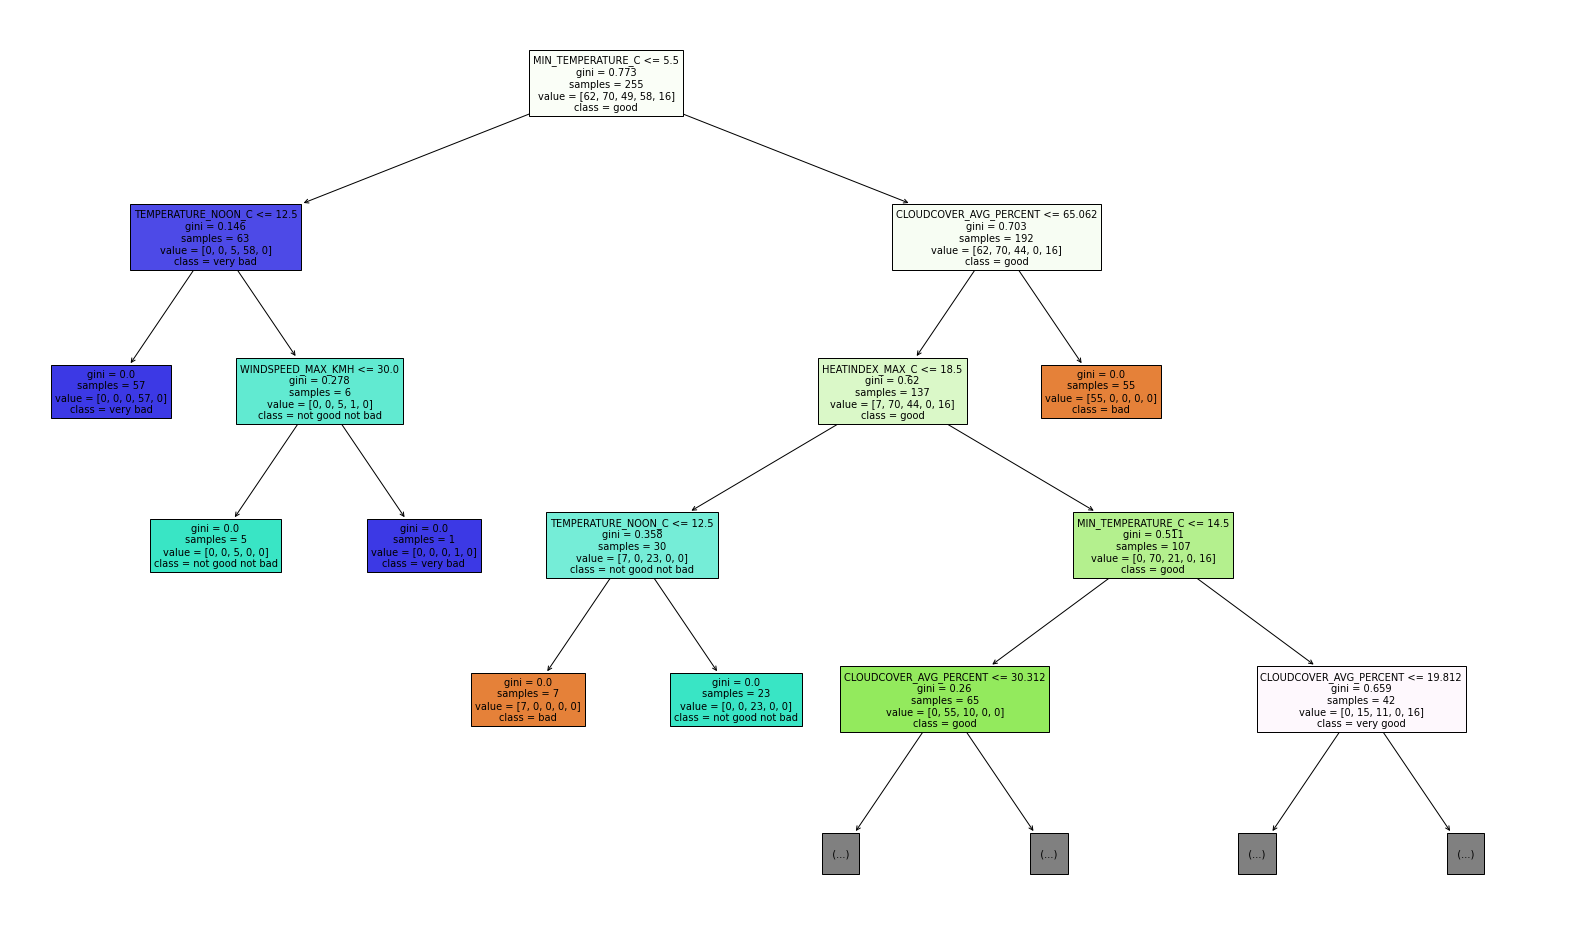

In [ ]:
plt.figure(figsize=(28, 17))
plot_tree(
    modelDTC,
    filled=True,
    class_names=modelDTC.classes_,
    feature_names=X_train.columns,
    max_depth=4
)

plt.show()

We can see on the graph above the first 4 depths, including 4 leafs already. As mentioned, we have decided to limit the max_depth to 6, which should give the best result. The algorithm has computed the gini score for each variable, and started with the highest, then the two other highest, etc, until a gini reaches 0 and that decision becomes a lead node.

You can check the full tree if necessary by uncommenting the code below (and right click to open in a new tab for more convenience).

In [ ]:
# plt.figure(figsize=(35, 25))
# plot_tree(
#     modelDTC,
#     filled=True,
#     class_names=modelDTC.classes_,
#     feature_names=X_train.columns,
#     max_depth=6
# )

# plt.show()